<a href="https://colab.research.google.com/github/AnikaMeem/Covid-19-Prediction-using-Chest-X-rays/blob/master/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset : https://cb.lk/covid_19

!wget https://cb.lk/covid_19

--2020-12-07 06:03:47--  https://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-07 06:03:48--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-07 06:03:48--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba7ac03b43c661bf96d45b61c1.dl.dropboxus

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

Data Processing


In [ ]:
# CNN based model in Keras

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])   





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

Training the CNN


In [ ]:
#Train from scratch 

train_dg = image.ImageDataGenerator(
    rescale = 1./255.0,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
) 

val_ds = image.ImageDataGenerator(rescale = 1./255.0)   


In [ ]:
train_generator = train_dg.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary')



Found 224 images belonging to 2 classes.


In [ ]:
valid_generator = val_ds.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary')


Found 60 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs = 10,
    validation_data = valid_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 64s 9s/step - loss: 0.0664 - accuracy: 0.9643 - val_loss: 0.0923 - val_accuracy: 0.9667
Epoch 2/10
7/7 [==============================] - 60s 9s/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0547 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 60s 9s/step - loss: 0.1121 - accuracy: 0.9598 - val_loss: 0.0586 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 61s 9s/step - loss: 0.0501 - accuracy: 0.9911 - val_loss: 0.0799 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 63s 9s/step - loss: 0.0583 - accuracy: 0.9732 - val_loss: 0.0748 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 60s 9s/step - loss: 0.0745 - accuracy: 0.9821 - val_loss: 0.0759 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 60s 9s/step - loss: 0.0554 - accuracy: 0.9821 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 8/10
7/7 [==================

In [ ]:
model.save("model_adv.h5")


In [ ]:
model.evaluate_generator(train_generator)

[0.05929502472281456, 0.9821428656578064]

In [ ]:
model.evaluate_generator(valid_generator)

[0.07198537141084671, 0.9666666388511658]

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
x_actual = []
x_test = []


In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    x_test.append(p[0,0])
    x_actual.append(1)
  

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    x_test.append(p[0,0])
    x_actual.append(0)

In [ ]:
x_actual = np.array(x_actual)
x_test = np.array(x_test)


In [ ]:
cm = confusion_matrix(x_actual, x_test)

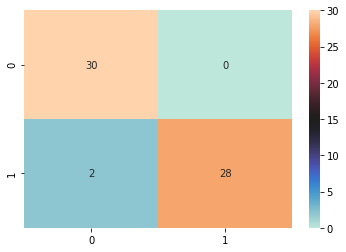

In [ ]:
sns.heatmap(cm, cmap = "icefire", annot = True)

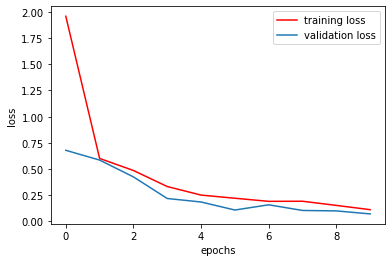

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

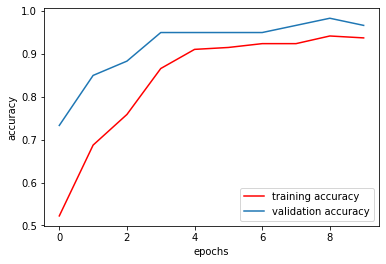

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()